In [3]:
pip install edfio

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
%pip install -c conda-forge edfio

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'conda-forge'


In [71]:
import numpy as np
import mne
import matplotlib.pyplot as plt
import os

In [72]:
path = r'C:\Users\than\OneDrive - wesleyan.edu\Documents - Melón Lab\Experiments\EXP240904\iEEG_data'
channels = ['EEG VTAA-B', 'EEG PFCA-B']
fmin, fmax = 1, 100
freqs_conn = np.linspace(1, 100, 100)
sfreq = 500
event_dict = {
    "Mouse In": 1,
    "EtOH Injected": 2,
    "Saline Injected": 2,
    "Juvenile In": 3
}

In [73]:
raw = mne.io.read_raw_edf(os.path.join(path,'802_F_EtOH.edf'), preload=True)
raw.pick(channels)
raw.notch_filter(freqs=[1.5, 60], picks=channels)
raw

Extracting EDF parameters from C:\Users\than\OneDrive - wesleyan.edu\Documents - Melón Lab\Experiments\EXP240904\iEEG_data\802_F_EtOH.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 4487999  =      0.000 ...  2243.999 secs...
Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 13201 samples (6.601 s)



<RawEDF | 802_F_EtOH.edf, 2 x 4488000 (2244.0 s), ~68.5 MiB, data loaded>

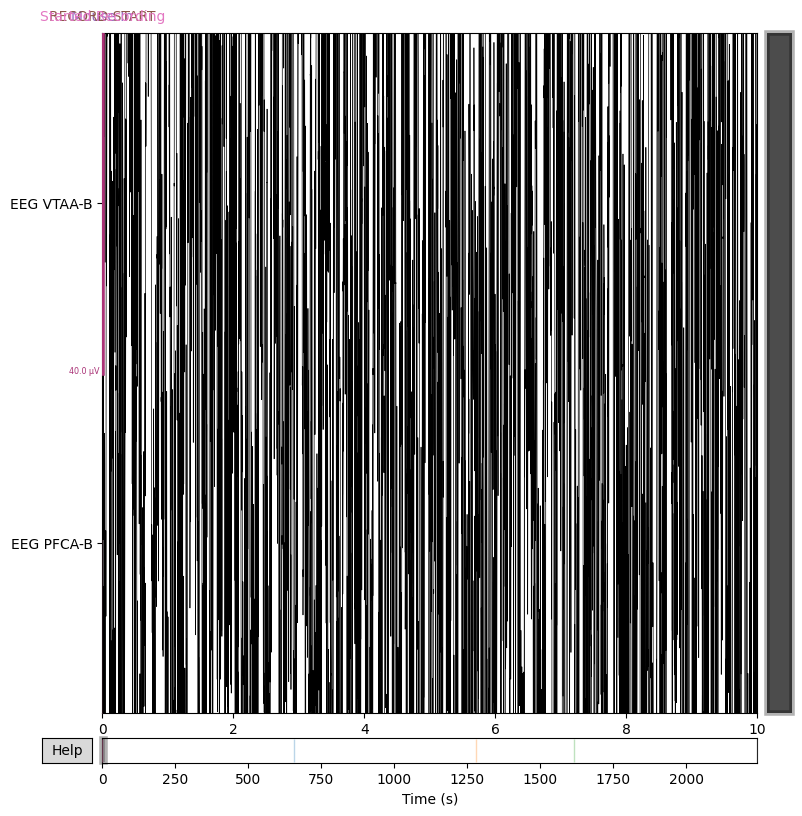

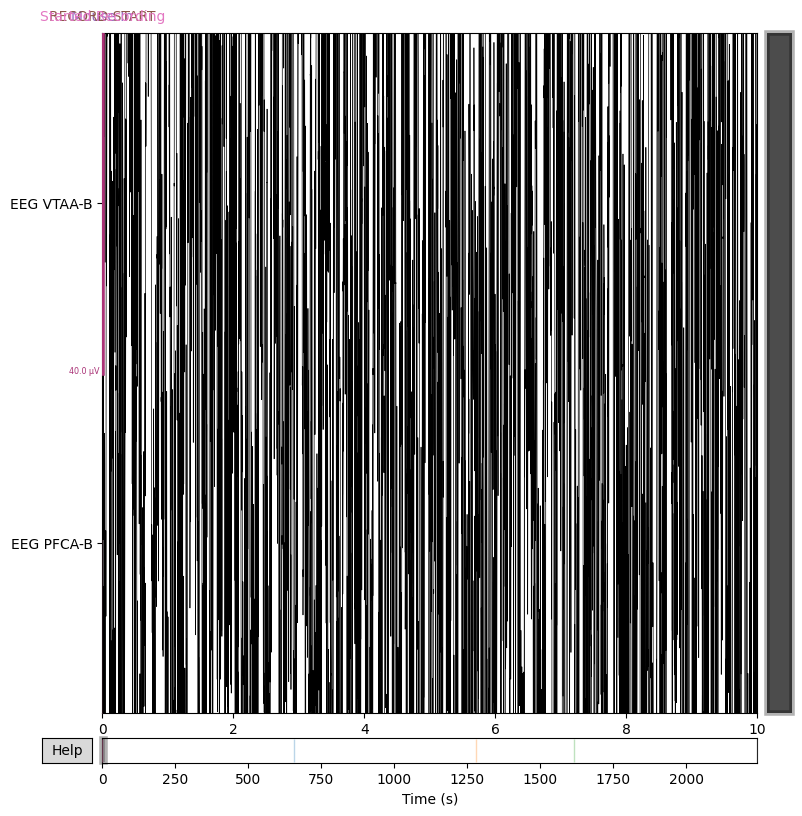

In [15]:
raw.plot()

Effective window size : 1.024 (s)
Plotting power spectral density (dB=True).


C:\Users\than\AppData\Local\Temp\ipykernel_5504\3970210453.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd (fmax = 100).plot(picks ="data",exclude= "bads", amplitude =False)
c:\Users\than\AppData\Local\Programs\Python\Python313\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


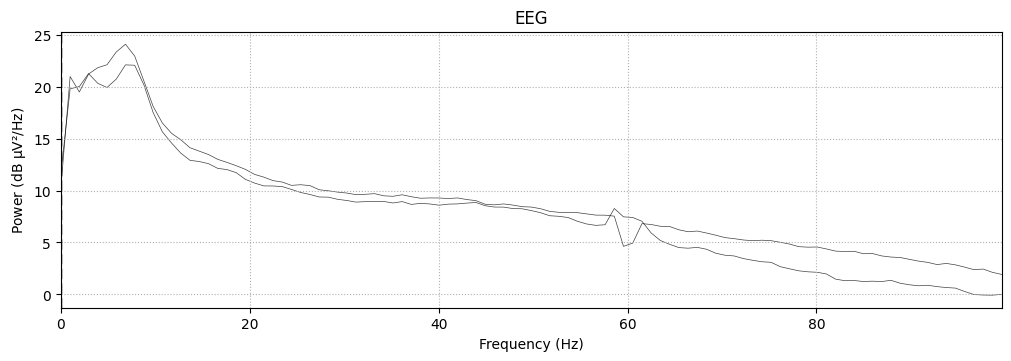

In [74]:
raw.compute_psd (fmax = 100).plot(picks ="data",exclude= "bads", amplitude =False)

In [75]:
raw.filter(l_freq=fmin, h_freq=fmax, picks=channels) # Filter data
raw.resample(sfreq=sfreq, method='polyphase')

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (3.300 s)

Polyphase resampling neighborhood: ±2 input samples


<RawEDF | 802_F_EtOH.edf, 2 x 1122000 (2244.0 s), ~17.1 MiB, data loaded>

Effective window size : 4.096 (s)
Plotting power spectral density (dB=True).


C:\Users\than\AppData\Local\Temp\ipykernel_5504\3934601764.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd (fmin = 1, fmax = 100).plot(picks ="data",exclude= "bads", amplitude =False)
c:\Users\than\AppData\Local\Programs\Python\Python313\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


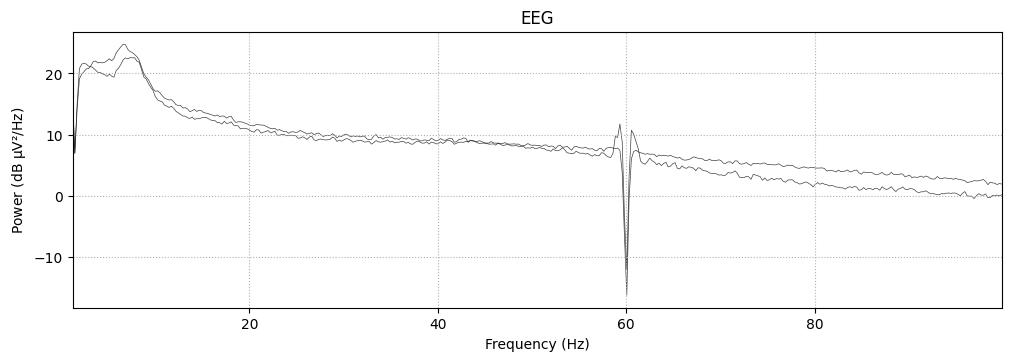

In [76]:
raw.compute_psd (fmin = 1, fmax = 100).plot(picks ="data",exclude= "bads", amplitude =False)

In [113]:
events, _ = mne.events_from_annotations(raw, event_id=event_dict)
epochs = mne.Epochs(raw, events, event_id=event_dict, tmin=400, tmax=500, baseline=None, preload=True)
epochs

Used Annotations descriptions: [np.str_('EtOH Injected'), np.str_('Juvenile In'), np.str_('Mouse In')]
Not setting metadata
3 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 3 events and 50001 original time points ...
0 bad epochs dropped


<Epochs | 3 events (all good), 400 – 500 s (baseline off), ~2.3 MiB, data loaded,
 'Mouse In': 1
 'EtOH Injected': 1
 'Saline Injected': 1
 'Juvenile In': 1>

In [114]:
baseline_epoch = epochs["Mouse In"]
EtOH_epoch = epochs["EtOH Injected"]
Juvenile_epoch = epochs["Juvenile In"]

No baseline correction applied


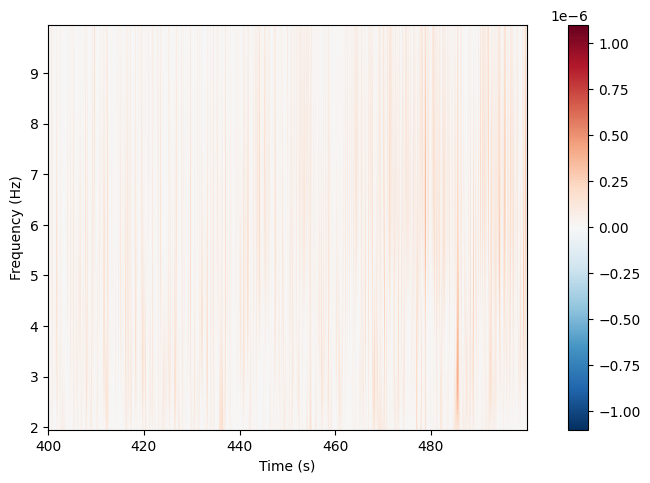

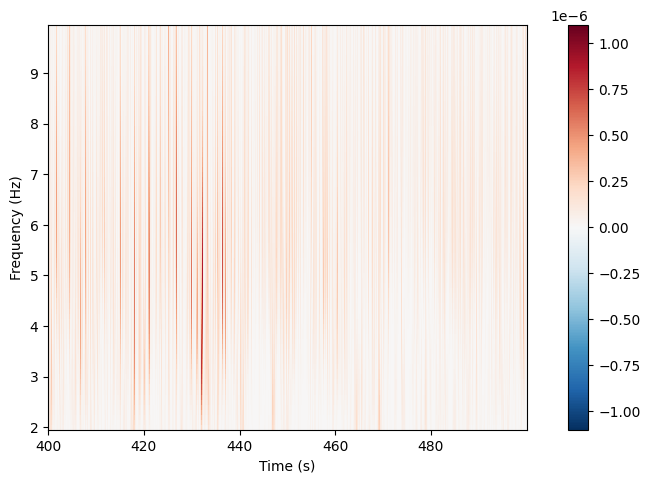

[<Figure size 640x480 with 2 Axes>, <Figure size 640x480 with 2 Axes>]

In [116]:
frequencies = np.arange(2, 10, 0.1)
power = Juvenile_epoch.compute_tfr(
    "morlet", n_cycles=2, return_itc=False, freqs=frequencies, decim=3, average=True
)
power.plot()

combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)


C:\Users\than\AppData\Local\Temp\ipykernel_5504\3254850322.py:3: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_compare_evokeds(


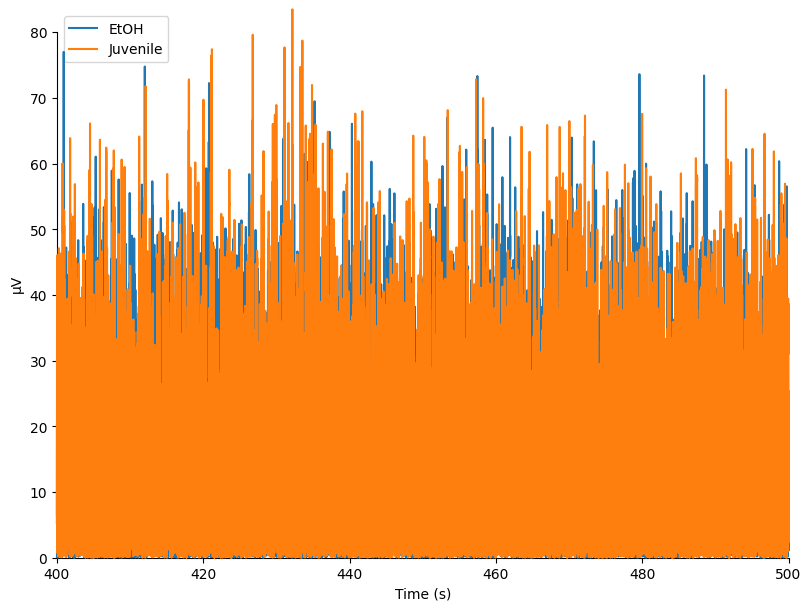

[<Figure size 800x600 with 1 Axes>]

In [117]:
EtOH_evoked = EtOH_epoch.average()
Juvenile_evoked = Juvenile_epoch.average()
mne.viz.plot_compare_evokeds(
    dict(EtOH=EtOH_evoked, Juvenile=Juvenile_evoked),
    legend="upper left",
    show_sensors="upper right",
)

In [118]:
print(raw.info)

<Info | 8 non-empty values
 bads: []
 ch_names: EEG VTAA-B, EEG PFCA-B
 chs: 2 EEG
 custom_ref_applied: False
 highpass: 1.0 Hz
 lowpass: 100.0 Hz
 meas_date: 2025-03-27 14:13:58 UTC
 nchan: 2
 projs: []
 sfreq: 500.0 Hz
 subject_info: <subject_info | his_id: PIN-42, sex: 1, last_name: 802, birthday: 1952-03-11>
>


In [57]:
annotations = raw.annotations
print(annotations)

<Annotations | 7 segments: EtOH Injected (1), Jail In (1), Juvenile In ...>


In [119]:
psd_dict = {}

for condition in event_dict.keys():
    epochs_condition = epochs[condition]
    data = epochs_condition.get_data(picks = channels)

    psds=[]
    for epoch in data:
        psd, freqs = mne.time_frequency.psd_array_multitaper(epoch, sfreq=250, fmin=1, fmax=10, verbose=False)
        psds.append(psd)
    psds_mean = np.mean(psds, axis=0) #Average across epochs
    
    psd_dict[condition]= (freqs, psds_mean)

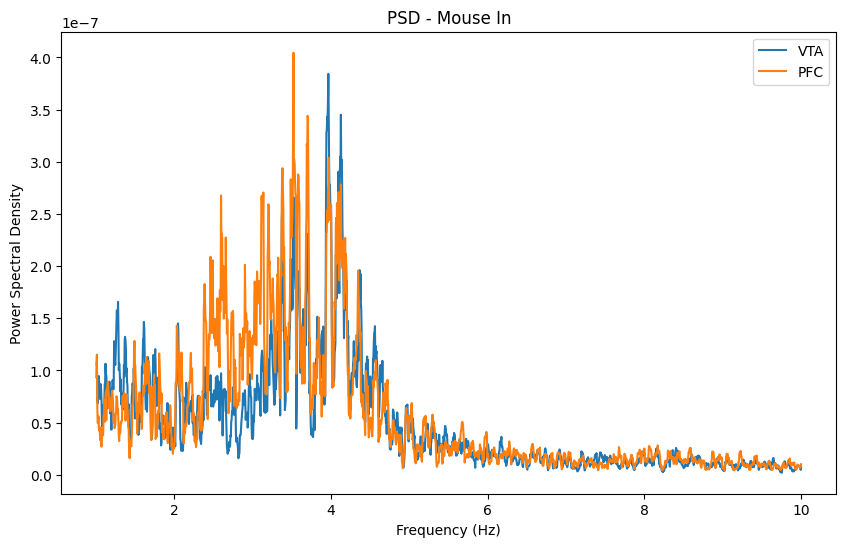

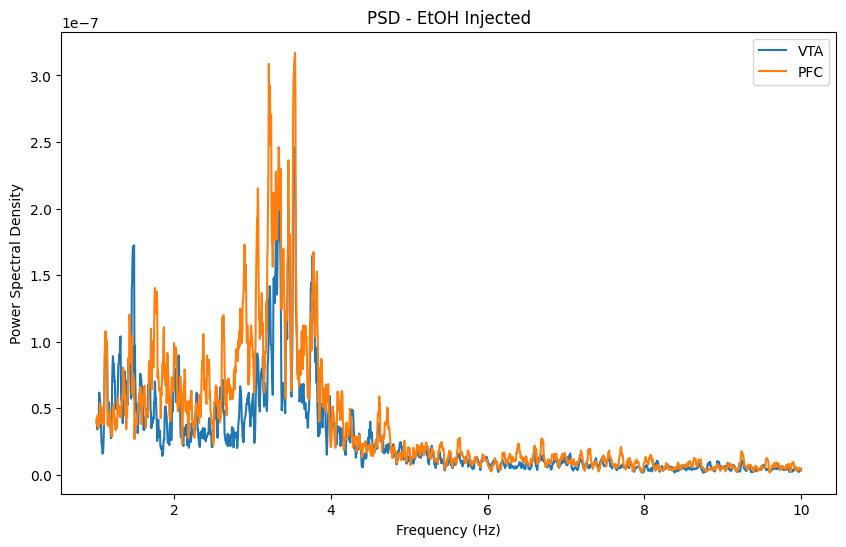

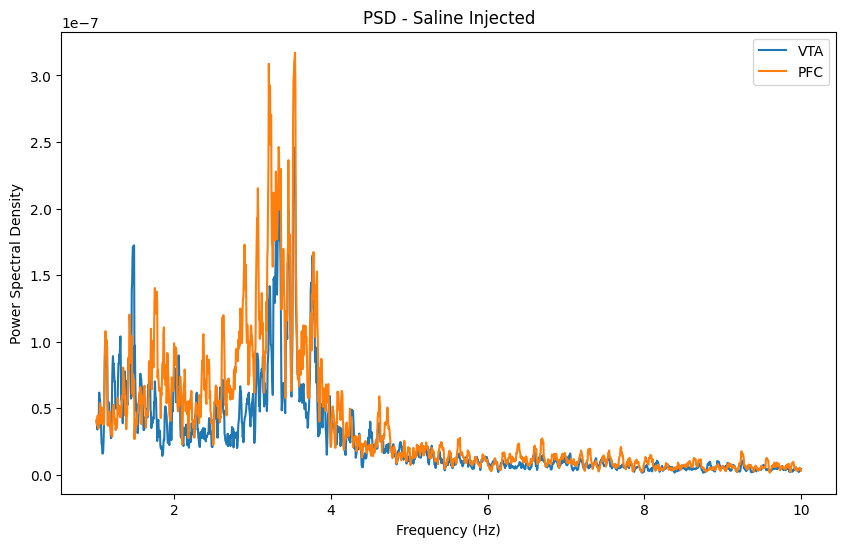

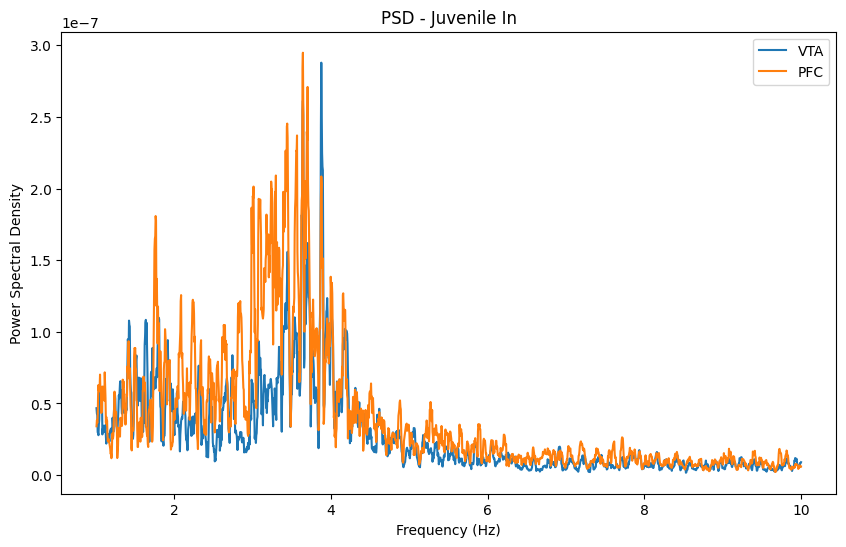

In [120]:
for condition, (freqs, psd_mean) in psd_dict.items():
    plt.figure(figsize=(10, 6))
    plt.title(f"PSD - {condition}")
    plt.plot(freqs, psd_mean[0], label='VTA')
    plt.plot(freqs, psd_mean[1], label='PFC')
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Power Spectral Density")
    plt.legend()
    plt.show()

In [15]:
from mne_connectivity import spectral_connectivity_time

In [93]:
con_dict ={}
sfreq = raw_edf.info["sfreq"]
freqs = np.linspace(1, 20, 10)

for condition in event_dict.keys():
    epochs_condition = epochs[condition]
    
    con = spectral_connectivity_time(
        data=epochs_condition.get_data(picks = ['EEG VTAA-B','EEG PFCA-B']),
        sfreq=sfreq,
        freqs=freqs,
        fmin = 1,
        fmax = 20,
        mode="multitaper",
        indices=(np.array([0]), np.array([1])),
        verbose=True,
    )

    con_dict[condition]=(freqs, con.get_data(output="dense"))

Connectivity computation...
   Processing epoch 1 / 1 ...


[Connectivity computation done]
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]


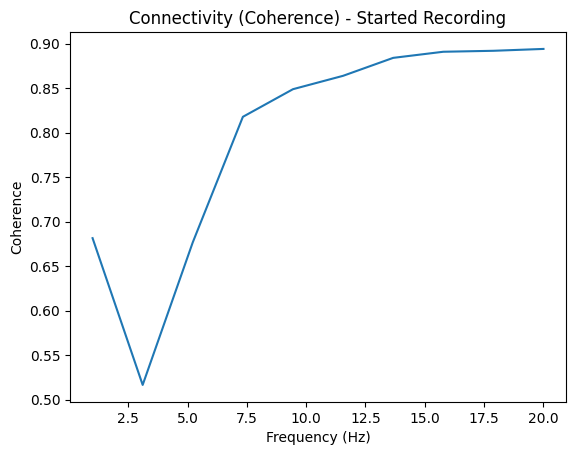

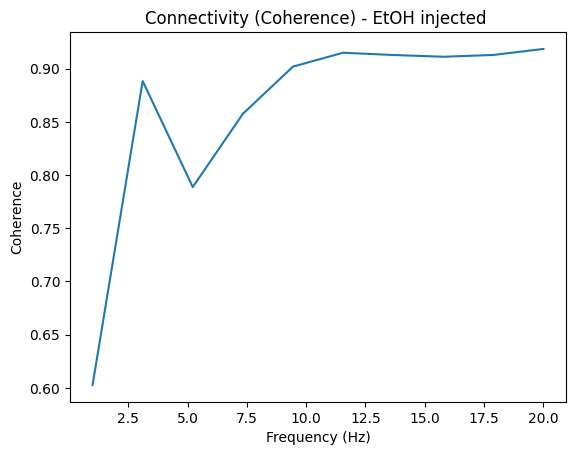

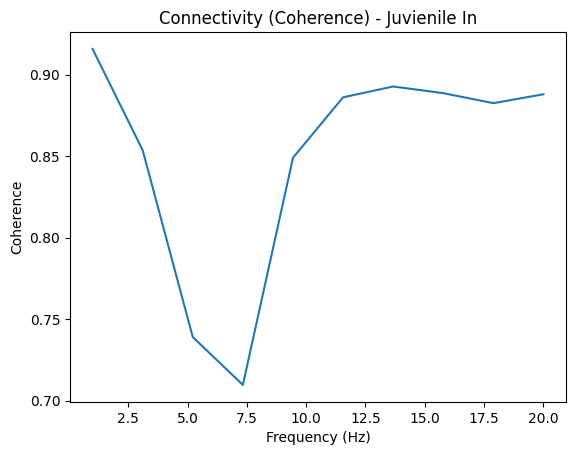

In [100]:
for condition, (freqs, con_data) in con_dict.items():
    plt.figure()
    plt.title(f"Connectivity (Coherence) - {condition}")
    con_avg = np.mean(con_data, axis=0)
    plt.plot (freqs, con_avg[0,1,:]) #coherence between VTA and PFC
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Coherence")
    plt.show()